### Datajoint Local troubleshooting notebook

In [1]:
import datajoint as dj
from adamacs import subject, surgery
from adamacs import utility

Local datajoint database setup: https://tutorials.datajoint.io/setting-up/local-database.html

In [2]:
# conda env create -f environment.yml
# docker run -p 3306:3306 -e MYSQL_ROOT_PASSWORD=tutorial datajoint/mysql

In [3]:
# Setup Local configuration
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'tutorial'
dj.conn()

Connecting root@127.0.0.1:3306


DataJoint connection (connected) root@127.0.0.1:3306

### Create schema and tables

In [4]:
utility.activate(subject.schema, create_schema=True, create_tables=True, schema_name='tutorial', linking_module=subject)

In [5]:
utility.activate(surgery.schema, create_schema=True, create_tables=True, schema_name='tutorial', linking_module=surgery)

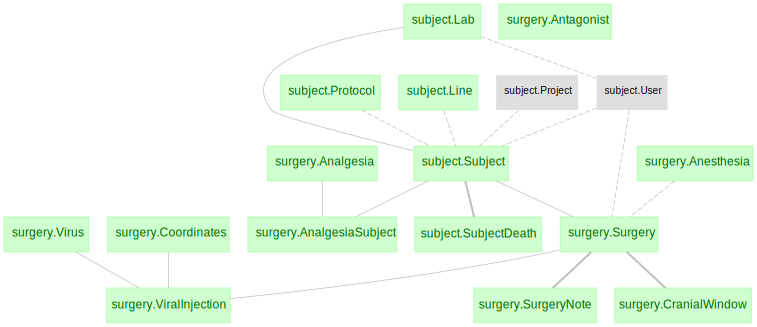

In [6]:
dj.ERD(subject.schema)

### Insert Animal Data

In [7]:
# Insert Laboratories
lab = subject.Lab()
lab_data = [
    ('Rose',
    'AG Rose, Circuit mechanisms of behavior',
    'Institute for Experimental Epileptology and Cognition Research',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET'),
    ('Gm',
    'AG Gründemann, Informationsverarbeitung neuronaler Schaltkreise',
    'DZNE',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET'),
    ('Fm',
    'AG Fuhrmann, Neuroimmunologie und Bildgebung',
    'DZNE',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET'),
    ('Beck',
    'AG Beck, Experimental Epileptology and Cognition Research',
    'Institute for Experimental Epileptology and Cognition Research',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET')
]

lab.insert(lab_data, skip_duplicates=True)
lab

lab short lab name,lab_name,institution,address,time_zone
Beck,"AG Beck, Experimental Epileptology and Cognition Research",Institute for Experimental Epileptology and Cognition Research,"Venusberg-Campus 1, 53127, Bonn",CET
Fm,"AG Fuhrmann, Neuroimmunologie und Bildgebung",DZNE,"Venusberg-Campus 1, 53127, Bonn",CET
Gm,"AG Gründemann, Informationsverarbeitung neuronaler Schaltkreise",DZNE,"Venusberg-Campus 1, 53127, Bonn",CET
Rose,"AG Rose, Circuit mechanisms of behavior",Institute for Experimental Epileptology and Cognition Research,"Venusberg-Campus 1, 53127, Bonn",CET


In [8]:
# Insert line
line = subject.Line()
line_data = [("SST-Cre", "The SST-Cre Mouse Line is Daniels favorite mouse line", "wt/tg", False),
             ("VGluT3-IRES-Cre", "", "tg/tg", False),
             ("VGluT2-Cre", "", "", False)]
line.insert(line_data, skip_duplicates=True)
line

line,line_description,target_phenotype,is_active
SST-Cre,The SST-Cre Mouse Line is Daniels favorite mouse line,wt/tg,0
VGluT2-Cre,,,0
VGluT3-IRES-Cre,,tg/tg,0


In [9]:
# Insert user
user = subject.User()
user.insert1(("danielmk",
             "Rose"))
user

user,lab short lab name
danielmk,Rose


In [10]:
# Insert Protocol
protocol = subject.Protocol()
protocol.insert1(("LANUF2",
                 "Basic Animal Protocol"))
protocol

protocol,protocol_description
LANUF2,Basic Animal Protocol


In [11]:
# Insert Project
project = subject.Project()
project.insert1(("Trace Eyeblink Conditioning",
                "Trace Eyeblink Conditioning Experiment on a running wheel"))
project

project,project_description
Trace Eyeblink Conditioning,Trace Eyeblink Conditioning Experiment on a running wheel


In [12]:
# Insert Subjects
animal = subject.Subject()
subject_data = [
    ('1223', 'Rose', 'M', '2020-08-13', 'Basic Mouse', 'SST-Cre', 'danielmk', "Trace Eyeblink Conditioning", "LANUF2"),
    ('1223', 'Beck', 'M', '2021-08-13', 'Basic Mouse', 'SST-Cre', 'danielmk', "Trace Eyeblink Conditioning", "LANUF2"),
    ('1224', 'Rose', 'M', '2020-08-13', 'Basic Mouse', 'SST-Cre', 'danielmk', "Trace Eyeblink Conditioning", "LANUF2")
]
animal.insert(subject_data, skip_duplicates=True)
animal

subject,lab short lab name,sex,subject_birth_date,subject_description,line,user,project,protocol
1223,Beck,M,2021-08-13,Basic Mouse,SST-Cre,danielmk,Trace Eyeblink Conditioning,LANUF2
1223,Rose,M,2020-08-13,Basic Mouse,SST-Cre,danielmk,Trace Eyeblink Conditioning,LANUF2
1224,Rose,M,2020-08-13,Basic Mouse,SST-Cre,danielmk,Trace Eyeblink Conditioning,LANUF2


In [13]:
# This should raise a duplication error
animal.insert1(('1223', 'Rose', 'M', '2020-08-13', 'Basic Mouse', 'SST-Cre', 'danielmk', "Trace Eyeblink Conditioning", "LANUF2"))
animal

DuplicateError: ("Duplicate entry '1223-Rose' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [ ]:
# Record subject death
animal = subject.SubjectDeath()
animal.insert1(('1223', 'Rose', '2021-10-10', 'Perfusion'))
animal

### Insert Surgery Data

In [14]:
# Create dummy records for our viruses
virus = surgery.Virus()
virus_data = [
    ('GCamp8s', 'AAV1', 'pGP-AAV-syn-jGCaMP8s-WPRE (AAV1)'),
    ('jRGECO1a', 'AAV1', 'pAAV.CAG.Flex.NES-jRGECO1a.WPRE.SV40 (AAV1)')
]
virus.insert(virus_data, skip_duplicates=True)
virus

name,serotype,long_name
GCamp8s,AAV1,pGP-AAV-syn-jGCaMP8s-WPRE (AAV1)
jRGECO1a,AAV1,pAAV.CAG.Flex.NES-jRGECO1a.WPRE.SV40 (AAV1)


In [15]:
# Create dummy anesthesia
anesthesia = surgery.Anesthesia()
anesthesia_data = [
    ('FMM', 'Fenanyl/Midalozam/Medetomidin'),
]
anesthesia.insert(anesthesia_data, skip_duplicates=True)
anesthesia

name,long_name
FMM,Fenanyl/Midalozam/Medetomidin


In [16]:
# Create dummy anesthesia
analgesia = surgery.Analgesia()
analgesia_data = [
    ('Ketoprofen', 'Ketoprofen'),
]
analgesia.insert(analgesia_data, skip_duplicates=True)
analgesia

name,long_name
Ketoprofen,Ketoprofen


In [17]:
# Create dummy anesthesia
antagonist = surgery.Antagonist()
antagonist_data = [
    ('NFA', 'Naloxon/Flumayenil/Atipamezol'),
]
antagonist.insert(antagonist_data, skip_duplicates=True)
antagonist

name,long_name
NFA,Naloxon/Flumayenil/Atipamezol


In [18]:
# Create dummy coordinates
coordinates = surgery.Coordinates()
coordinates_data = [
    ('CA3VR', -0.23, -0.17, -0.24, 'Injection into ventral CA3 in right hemisphere.'),
    ('CA3VL', -0.23, 0.17, -0.24, 'Injection into ventral CA3 in right hemisphere.')
]
coordinates.insert(coordinates_data, skip_duplicates=True)
coordinates

location,x_coordinate in mm,y_coordinate in mm,z_coordinate in mm,description
CA3VL,-0.23,0.17,-0.24,Injection into ventral CA3 in right hemisphere.
CA3VR,-0.23,-0.17,-0.24,Injection into ventral CA3 in right hemisphere.


In [19]:
# Perform a surgery with two viral injections followed by a cranial window
sur = surgery.Surgery()
# Add the surgery
sur.insert1(('1223', 'Rose', '21-10-12', 23, '13:00', '15:00', 'danielmk', 'FMM', '12:40'))
# Add the viral injections
vi = surgery.ViralInjection()
vi.insert1(('1223', 'Rose', '21-10-12', 'GCamp8s', 'AAV1', 'CA3VR', '13:30', 500))  # Inject GCamp8s into the right ventral CA3
vi.insert1(('1223', 'Rose', '21-10-12', 'jRGECO1a', 'AAV1', 'CA3VL', '14:00', 500))  # Inject JRGECO into the right ventral CA3

# Add cranial window
cw = surgery.CranialWindow()
cw.insert1(('1223', 'Rose', '21-10-12', '14:30'))  # Apply cranial window

# Give analgesia
ag = surgery.AnalgesiaSubject()
ag.insert1(('Ketoprofen', '1223', 'Rose', '21-10-12 12:55'))  # Analgesia before surgery
ag.insert1(('Ketoprofen', '1223', 'Rose', '21-10-12 15:00'))  # Analgesia after surgery
ag.insert1(('Ketoprofen', '1223', 'Rose', '21-10-13 15:00'))  # Analgesia day after surgery
ag.insert1(('Ketoprofen', '1223', 'Rose', '21-10-14 15:00'))  # Analgesia second day after surgery
ag.insert1(('Ketoprofen', '1223', 'Rose', '21-10-15 15:00'))  # Analgesia third day after surgery
sur

# Add a surgery note
sn = surgery.SurgeryNote()
sn.insert1(('1223', 'Rose', '21-10-12',
            'The surgery went exceeedingly well. Absolutely nothing went wrong. It could not have gone better and I am' +
            'extemely happy with the way it went. The mouse woke up and is in excellent condition. I hope all my surgeries' +
            'will be like this one.'))

AttributeError: module 'adamacs.surgery' has no attribute 'SurgeryNotes'

In [22]:
vi

subject,lab short lab name,date,name,serotype,location,datetime,volume in ul
1223,Rose,2021-10-12,GCamp8s,AAV1,CA3VR,13:30:00,500.0
1223,Rose,2021-10-12,jRGECO1a,AAV1,CA3VL,14:00:00,500.0


In [23]:
cw

subject,lab short lab name,date,datetime
1223,Rose,2021-10-12,14:30:00


In [22]:
ag

name,subject,lab short lab name,datetime
Ketoprofen,1223,Rose,2021-10-12 12:55:00
Ketoprofen,1223,Rose,2021-10-12 15:00:00
Ketoprofen,1223,Rose,2021-10-13 15:00:00
Ketoprofen,1223,Rose,2021-10-14 15:00:00
Ketoprofen,1223,Rose,2021-10-15 15:00:00


In [21]:
sn

subject,lab short lab name,date,note
1223,Rose,2021-10-12,The surgery went exceeedingly well. Absolutely nothing went wrong. It could not have gone better and I amextemely happy with the way it went. The mouse woke up and is in excellent condition. I hope all my surgerieswill be like this one.
